In [1]:
#pip install gensim nltk annoy
#pip install "scipy<1.13"
#pip install scikit-learn
#pip install matplotlib
#pip install pinecone-client

In [2]:
import nltk
import numpy as np
import os
import codecs

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/fansan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/fansan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to preprocess a document
def preprocess(document):
    # Tokenize the document
    tokens = word_tokenize(document)
    # Remove stop words and stem the tokens
    tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('english')]
    return tokens

In [4]:
print(preprocess("This is a sample document."))

['thi', 'sampl', 'document', '.']


In [5]:
from gensim.models import Word2Vec

# Train a Word2Vec model on the documents
def train_word2vec(documents):
    model = Word2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Load the documents from a directory
def load_documents(directory):
    documents = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with codecs.open(os.path.join(directory, filename), 'r', encoding='utf8') as f:
                documents.append(f.read())
                filenames.append(filename)
    return documents, filenames

# Function to generate a document embedding
def embed_document(model, document):
    # Preprocess the document
    tokens = preprocess(document)
    # Generate the embedding
    embedding = [model.wv[token] for token in tokens if token in model.wv]
    return embedding

In [6]:
documents, filenames = load_documents("../samples")

model = train_word2vec(documents)

print(embed_document(model, "How can we train our remote sales team in Asia?"))

[array([-0.27319345,  0.6167091 ,  0.70062613, -0.00953952, -0.3057155 ,
       -0.6782077 ,  0.41312435,  0.4103908 ,  0.936135  , -0.13494831,
        1.2249254 ,  0.2340069 ,  0.367108  , -0.571456  , -0.137607  ,
       -0.36835375,  0.10026297, -0.2302526 , -0.593849  ,  0.7143463 ,
        0.8719318 ,  0.8227084 ,  0.02351221,  0.17120636,  0.0420592 ,
       -0.10639428,  0.5460289 , -0.12321997,  0.07473816, -0.6689322 ,
       -1.1386018 ,  0.14361966, -0.7942284 ,  0.45642474,  0.48301682,
       -0.5595097 ,  0.4696943 , -0.4541881 ,  0.37243408,  0.14996307,
       -0.42452732,  0.7351368 ,  0.20949167, -0.48921466, -0.09745809,
        0.4978628 , -0.34175298,  0.46515396, -0.19870786, -0.45649213,
        0.24730872,  0.9406864 ,  0.01912598, -0.9671687 ,  1.0158322 ,
       -0.14528665,  0.15969186,  0.55370593,  0.25284582,  0.26688707,
       -0.34654462, -0.0222885 , -0.30548152, -0.47562793,  0.659854  ,
       -0.36369568, -0.28700697, -0.38237688,  0.38021606, -0.6

In [7]:
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [8]:
def document_similarity(model, doc1, doc2):
    # Embed the documents
    embedding1 = embed_document(model, doc1)
    embedding2 = embed_document(model, doc2)
    # Compute the mean of the embeddings
    mean1 = np.mean(embedding1, axis=0)
    mean2 = np.mean(embedding2, axis=0)
    # Compute the cosine similarity between the means
    return cosine_similarity(mean1, mean2)

In [9]:
# # Example usage
# doc1 = "How can we train our remote sales team in Asia?"
# doc2 = documents[0]
# print(document_similarity(model, doc1, doc2))

In [10]:
from sklearn.cluster import KMeans

def cluster_documents(model, documents, n_clusters):
    # Embed the documents
    embeddings = [np.mean(embed_document(model, doc), axis=0) for doc in documents]
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)
    return kmeans.labels_

In [11]:
# # Example usage
# documents = ["This is a sample document.", "This is college document.", "This is yet another document.", "One more document.", "Document number five.", "And another one.", "The final document.", "Psychology is the science of mind and behavior.", "The mind is the set of cognitive faculties including consciousness, imagination, perception, thinking, judgment, language, and memory.", "The behavior is the actions and manners of individuals or groups in response to external or internal stimuli.", "Behavior refers to the way in which someone conducts oneself, especially in relation to others.", "Politics is the set of activities that are associated with making decisions in groups or other forms of power relations between individuals, such as the distribution of resources or status.", "The political science is the study of politics and government from the local to the global level.", "History is the study of the past events, particularly in human affairs.", "History is the discipline that records and interprets past events involving human beings.", "The historian is the person who studies and writes about the past and is regarded as an authority on it.", "Historians are concerned with the continuous, methodical narrative and research of past events as relating to the human.",
#              "history is the study of the past events, particularly in human affairs.", "history is the discipline that records and interprets past events involving human beings.", "the historian is the person who studies and writes about the past and is regarded as an authority on it.", "historians are concerned with the continuous, methodical narrative and research of past events as relating to the human.",
#              "history is the study of the past events, particularly in human affairs.", "history is the discipline that records and interprets past events involving human beings.", "the historian is the person who studies and writes about the past and is regarded as an authority on it.", "historians are concerned with the continuous, methodical narrative and research of past events as relating to the human."]

# print(cluster_documents(model, documents, n_clusters=2))

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_clusters(model, documents, labels):
    # Embed the documents
    embeddings = [np.mean(embed_document(model, doc), axis=0) for doc in documents]
    # Reduce the dimensionality of the embeddings to 2D
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    # Plot the documents in 2D, colored by cluster
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels)
    plt.show()

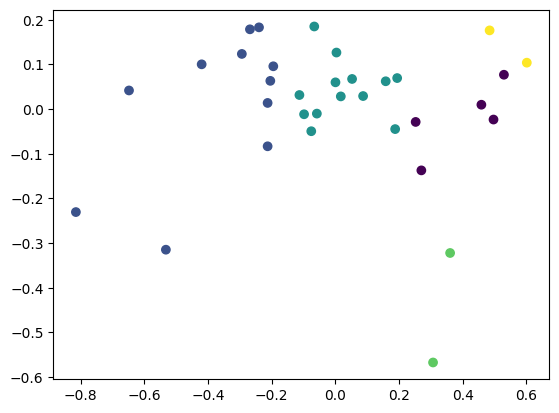

In [13]:
# Example usage
example_doc = documents
labels = cluster_documents(model, documents, n_clusters=5)
visualize_clusters(model, example_doc, labels)

In [14]:
labels

array([1, 1, 2, 1, 0, 4, 1, 2, 1, 2, 0, 2, 2, 4, 0, 2, 2, 2, 0, 1, 1, 2,
       1, 2, 2, 1, 0, 3, 2, 2, 1, 1, 3], dtype=int32)

In [15]:
def top3_similar_documents(model, input_doc, documents, filenames):
    # Embed the input document
    input_embedding = np.mean(embed_document(model, input_doc), axis=0)
    # Compute the similarity with each document
    similarities = [cosine_similarity(input_embedding, np.mean(embed_document(model, doc), axis=0)) for doc in documents]
    # Get the indices of the top 3 documents
    top3_indices = np.argsort(similarities)[-3:]
    # Return the filenames of the top 3 documents
    return [filenames[i] for i in top3_indices]


In [31]:
input_doc = "Training Strategies for Remote Sales Teams in APAC?"
top3 = top3_similar_documents(model, input_doc, documents, filenames)
print(top3)

['27.txt', '30.txt', '31.txt']
